In [2]:
import os

import tensorflow as tf
import numpy as np
import sys
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as spstats
import pickle


sys.path.insert(0, '/home/hiranumn/DeepProteinAccuracyNet/src')
from resnet import *
from deepLearningUtils import *
from model import *

In [3]:
X = dataloader(["5lc2A"], lengthmax=280, distribution=False)

tag0331


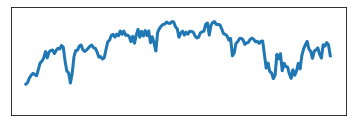

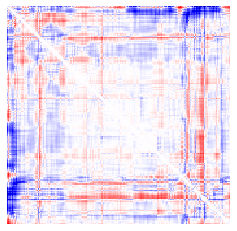

In [11]:
directory = "mm/"
for i in range(len(X.samples_dict["5lc2A"])):
    name = X.samples_dict["5lc2A"][i]
    print(name)
    
    _,_,_,y = X.next(pindex=i)
    lddt, esto, mask = y
    mask = mask < 15
    
    if name != "native":
        temp = np.load(directory+name+".relaxed.al.npz")
    else:
        temp = np.load(directory+name+".npz")
        
    lddt_pred = temp["lddt"]
    esto_pred = temp["estogram"]
    mask_pred = temp["mask"]

    digitizations = [-20.0, -15.0, -10.0, -4.0, -2.0, -1.0, -0.5, 0.5, 1.0, 2.0, 4.0, 10.0, 15.0, 20.0]
    masses = [digitizations[0]]+[(digitizations[i]+digitizations[i+1])/2 for i in range(len(digitizations)-1)]+[digitizations[-1]]
    
    plt.figure(figsize=(6,2))
    plt.plot(range(len(lddt_pred)), lddt_pred, label="predicted", linewidth=3)
    
    #plt.plot(range(len(lddt)), lddt, label="true")
    #plt.legend()
    
    plt.yticks([],[])
    plt.xticks([],[])
    plt.ylim(0,1)
    plt.show()

    plt.figure(figsize=(4,4))
    plt.subplot(111)
    #sns.heatmap(np.sum(esto*masses, axis=-1), cbar=False, cmap="seismic", vmin=-20, vmax=20)
    #plt.subplot(122)
    sns.heatmap(np.sum(esto_pred*masses, axis=-1), cbar=False, cmap="seismic", vmin=-20, vmax=20)
    plt.yticks([],[])
    plt.xticks([],[])
    plt.show()

    #plt.figure(figsize=(4,2))
    #plt.subplot(121)
    #sns.heatmap(mask, cbar=False, cmap="seismic", vmin=-1, vmax=1)
    #plt.subplot(122)
    #sns.heatmap(mask_pred, cbar=False, cmap="seismic", vmin=-1, vmax=1)
    #plt.show()
    break